In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df_train["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [7]:
df_train["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [8]:
df_train["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [9]:
df_train = pd.get_dummies(df_train, columns=["Gender", "Vehicle_Damage", "Vehicle_Age"], drop_first=True,)

In [10]:
df_test = pd.get_dummies(df_test, columns=["Gender", "Vehicle_Damage", "Vehicle_Age"], drop_first=True)

In [11]:
df_train_new = df_train.drop(columns = "id", axis = 1)

<AxesSubplot:title={'center':'Correlation plot'}>

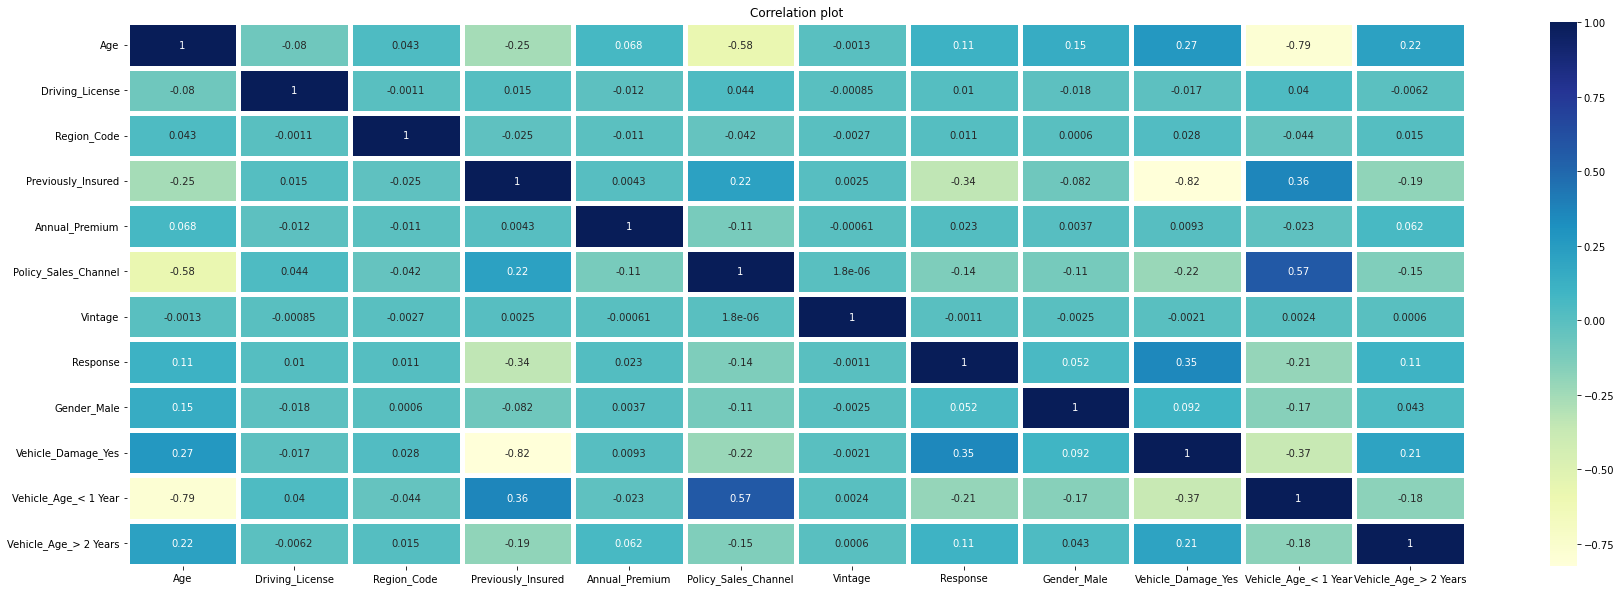

In [12]:
plt.figure(figsize=(30,10))
plt.title("Correlation plot")
sns.heatmap(df_train_new.corr(),linewidths=5, annot=True,cmap='YlGnBu')

In [17]:
df_test.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,25,1,11.0,1,35786.0,152.0,53,1,0,1,0
1,381111,40,1,28.0,0,33762.0,7.0,111,1,1,0,0
2,381112,47,1,28.0,0,40050.0,124.0,199,1,1,0,0
3,381113,24,1,27.0,1,37356.0,152.0,187,1,1,1,0
4,381114,27,1,28.0,1,59097.0,152.0,297,1,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [24]:
X = df_train.drop(["Response","id"], axis = 1)
y=df_train['Response']

In [22]:
X_valid = df_test.drop("id", axis = 1)

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
X_valid = scale.fit_transform(X_valid)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.74%


In [43]:
y_valid_pred = (clf.predict_proba(X_valid)[:,1]).round(2)

In [44]:
submit = pd.DataFrame({'id': df_test.id, 'Response': y_valid_pred})
submit.to_csv('submission.csv', index=False)

In [46]:
submit.head()

,id,Response
0,381110,0.00
1,381111,0.37
2,381112,0.28
3,381113,0.00
4,381114,0.00
